# Starting Point

This noebook focuses on analyzing consilate sales data and comparing it the expected sales quota.

In [ ]:
# Download the Poppins font from Google Fonts
!wget -q https://github.com/google/fonts/raw/main/ofl/poppins/Poppins-Regular.ttf

In [ ]:
# upload data
from google.colab import files
upl =files.upload()

Saving Sales vs Quotas Original.xlsx to Sales vs Quotas Original.xlsx


In [ ]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.font_manager as fm
warnings.filterwarnings('ignore')


# Add font to matplotlib
fm.fontManager.addfont('Poppins-Regular.ttf')
plt.rcParams['font.family'] = 'Poppins'


In [ ]:
# read excel data
df = pd.read_excel('Sales vs Quotas Original.xlsx')
# preview data
df.head(5)

,ProductKey,ProductName,ProductDescription,ProductSubcategoryKey,Manufacturer,BrandName,ClassName,ColorName,Weight,WeightUnitMeasureID,...,TotalDiscountAmount,TotalCost,AvgUnitCost,AvgUnitPrice,AVG_sales_quant_quota,TotalSalesQuota,TotalMarginQuota,Year,Months,Quota_month_date
0,1,Contoso 512MB MP3 Player E51 Silver,512MB USB driver plays MP3 and WMA,1,"Contoso, Ltd",Contoso,Economy,Silver,4.8,ounces,...,107.1675,357.48,6.62,12.99,5.9099,17236.2865,7365.7322,2007,January,Jan 2007
1,1,Contoso 512MB MP3 Player E51 Silver,512MB USB driver plays MP3 and WMA,1,"Contoso, Ltd",Contoso,Economy,Silver,4.8,ounces,...,78.0699,403.82,6.62,12.99,6.1864,14559.6464,6462.8044,2007,February,Feb 2007
2,1,Contoso 512MB MP3 Player E51 Silver,512MB USB driver plays MP3 and WMA,1,"Contoso, Ltd",Contoso,Economy,Silver,4.8,ounces,...,96.9054,364.10,6.62,12.99,6.6866,13133.5868,5635.3919,2007,March,Mar 2007
3,1,Contoso 512MB MP3 Player E51 Silver,512MB USB driver plays MP3 and WMA,1,"Contoso, Ltd",Contoso,Economy,Silver,4.8,ounces,...,107.5572,741.44,6.62,12.99,7.3846,23295.9337,10731.9147,2007,April,Apr 2007
4,1,Contoso 512MB MP3 Player E51 Silver,512MB USB driver plays MP3 and WMA,1,"Contoso, Ltd",Contoso,Economy,Silver,4.8,ounces,...,23.3820,549.46,6.62,12.99,7.2222,22924.5680,10131.7624,2007,May,May 2007


In [ ]:
# shape ofdata
df.shape

(75074, 28)

In [ ]:
# # group data by year
# df = df.groupby(df['Year'])
# # preview data)
# df.head(3)

Text(0.5, 1.0, 'Data Description')

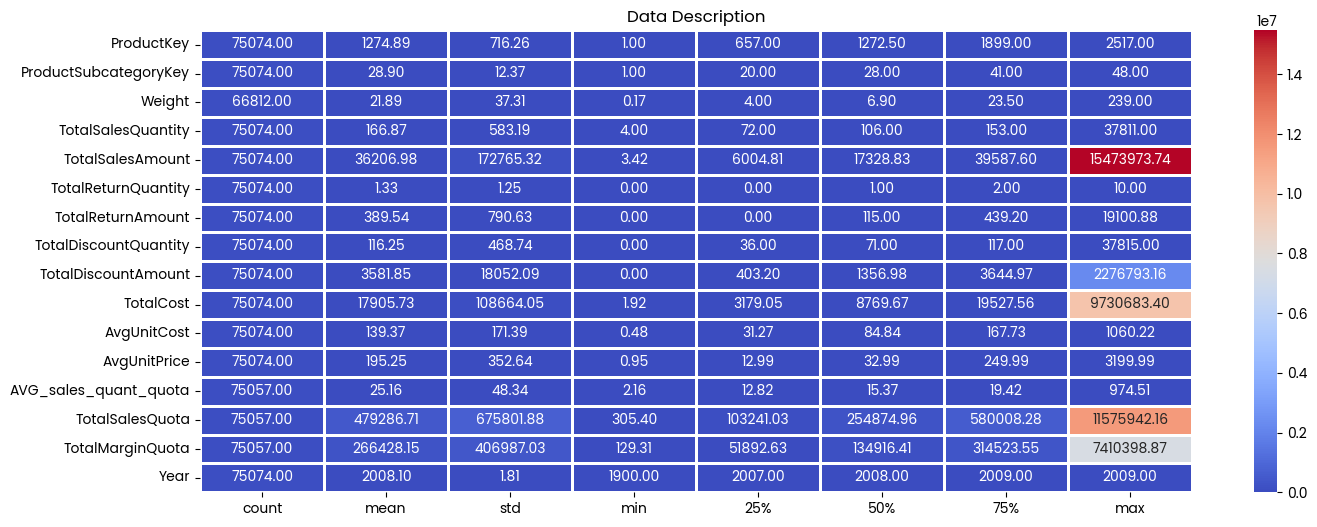

In [ ]:
# data description heatmap
data_description = df.describe().T
# plot heatmap
plt.figure(figsize=(16, 6))
sns.heatmap(data_description, annot=True, fmt=".2f", cmap="coolwarm", linewidths=2)
plt.title('Data Description')

In [ ]:
#Check for missing values
df.isnull().sum()

,0
ProductKey,0
ProductName,0
ProductDescription,36
ProductSubcategoryKey,0
Manufacturer,0
BrandName,0
ClassName,0
ColorName,0
Weight,8262
WeightUnitMeasureID,6513


In [ ]:
# drop unneeded column
columns_to_drop= ['WeightUnitMeasureID','UnitOfMeasureName']
df.drop(columns_to_drop, axis=1, inplace=True)

In [ ]:
# droping missing values
df.dropna(inplace=True)
# check for missing values
df.isnull().sum()

,0
ProductKey,0
ProductName,0
ProductDescription,0
ProductSubcategoryKey,0
Manufacturer,0
BrandName,0
ClassName,0
ColorName,0
Weight,0
StockTypeName,0


In [ ]:
df['TotalDiscountQuantity']

,TotalDiscountQuantity
0,54
1,61
2,55
3,57
4,18
...,...
75069,2643
75070,2642
75071,640
75072,5762


In [ ]:
#check for duplicated data
print('The amount of duplicated data present:',df.duplicated().sum())
# droping duplicated data
df = df.drop_duplicates()
# new line to separate result
print('-----------------------------------------------------')
print('Final amount of duplicated values remaining:', df.duplicated().sum())

The amount of duplicated data present: 0
-----------------------------------------------------
Final amount of duplicated values remaining: 0


In [ ]:
# data type info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66797 entries, 0 to 75073
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ProductKey             66797 non-null  int64  
 1   ProductName            66797 non-null  object 
 2   ProductDescription     66797 non-null  object 
 3   ProductSubcategoryKey  66797 non-null  int64  
 4   Manufacturer           66797 non-null  object 
 5   BrandName              66797 non-null  object 
 6   ClassName              66797 non-null  object 
 7   ColorName              66797 non-null  object 
 8   Weight                 66797 non-null  float64
 9   StockTypeName          66797 non-null  object 
 10  Sale_month_year        66797 non-null  object 
 11  TotalSalesQuantity     66797 non-null  int64  
 12  TotalSalesAmount       66797 non-null  float64
 13  TotalReturnQuantity    66797 non-null  int64  
 14  TotalReturnAmount      66797 non-null  float64
 15  TotalDi

# Visualization

In [ ]:
# base bar char function:
def plot_bar_chart(
    df,
    x,                        # Column for X-axis (categorical or datetime or numeric buckets)
    y,                        # Column for Y-axis (values to aggregate)
    agg_func='sum',           # Aggregation: 'sum', 'mean', 'count', etc.
    title='Bar Chart',        # Chart title
    palette='magma',          # Seaborn color palette
    font_family='Poppins',    # Font (make sure it's installed or registered)
    figsize=(10, 6),          # Figure size
    annotate=True,            # Add value labels on bars
    edgecolor='black',        # Outline color for bars
    sort_values=False,        # Sort bars by Y values
    ascending=True,          # Sort order if sort_values=True
    hue = 'None'

):
    """
    General-purpose seaborn bar chart plotter.

    Parameters:
    - df (DataFrame): your data
    - x (str): column name for X-axis categories
    - y (str): column name for Y-axis values
    - agg_func (str): aggregation function: 'sum', 'mean', 'count', etc.
    - title (str): chart title
    - palette (str): seaborn palette (e.g., 'magma', 'viridis', 'coolwarm', etc.)
    - font_family (str): font to use (ensure installed)
    - figsize (tuple): size of figure
    - annotate (bool): add labels on top of bars
    - edgecolor (str): color of bar edges
    - sort_values (bool): whether to sort bars
    - ascending (bool): sort order if sorting
    """

    # Set font globally (ensure you’ve installed or registered the font)
    plt.rcParams['font.family'] = font_family

    # Group and aggregate
    grouped = df.groupby(x)[y].agg(agg_func).reset_index()

    # Optional: sort by Y value
    if sort_values:
        grouped = grouped.sort_values(by=y, ascending=ascending)

    # Apply seaborn whitegrid style for clean visuals
    sns.set_style("whitegrid")

    # Create figure
    plt.figure(figsize=figsize)

    # Bar plot using seaborn
    barplot = sns.barplot(
        data=grouped,
        x=x,
        y=y,
        palette=palette,
        edgecolor=edgecolor
    )

    # Annotate each bar with its value
    if annotate:
        for p in barplot.patches:
            height = p.get_height()
            barplot.annotate(
                f'{height:,.0f}',  # Add comma formatting
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=10, fontweight='medium',
                color='green', xytext=(0, 5),
                textcoords='offset points'
            )

    # Title and labels
    plt.title(title, fontsize=16, fontweight='medium')
    plt.xlabel(x, fontsize=12)
    plt.ylabel(f'{agg_func.capitalize()} of {y}', fontsize=12)

    # Tidy layout and remove top/right borders
    sns.despine()
    plt.tight_layout()
    plt.show()


### 1. What Year had the most sales?

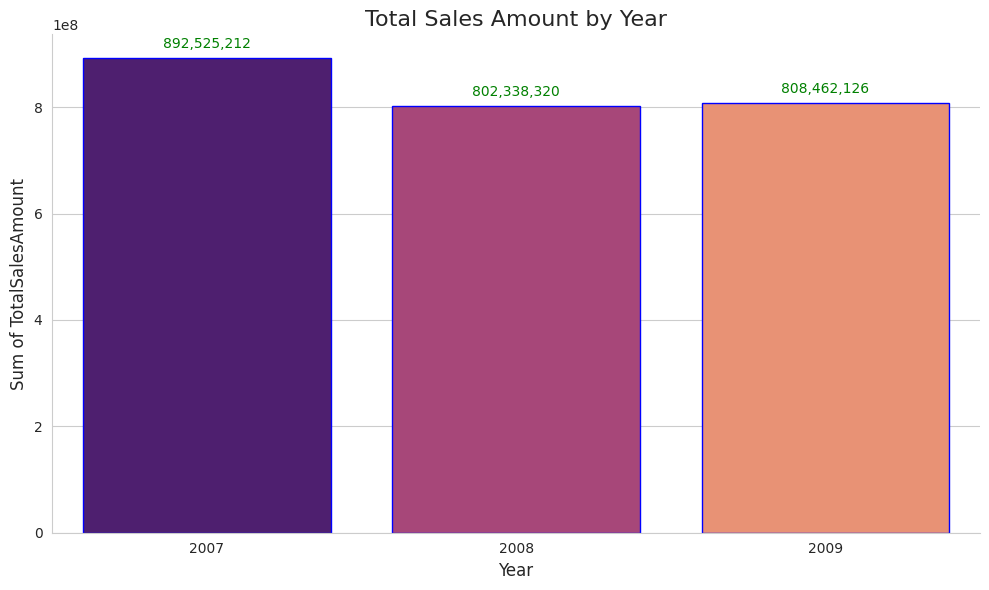

In [ ]:
# Sample grouped data
sales_by_year = df.groupby('Year')['TotalSalesAmount'].sum().reset_index()
# barchar plot of sum of sales across the years
plot_bar_chart(sales_by_year,'Year','TotalSalesAmount',title='Total Sales Amount by Year',edgecolor='blue')

Answer: 2007 with $892 million in  sales revenue.
Why tho? Economic factors? either way the main question has been answered.

### 2. Which product categories had the most sales?

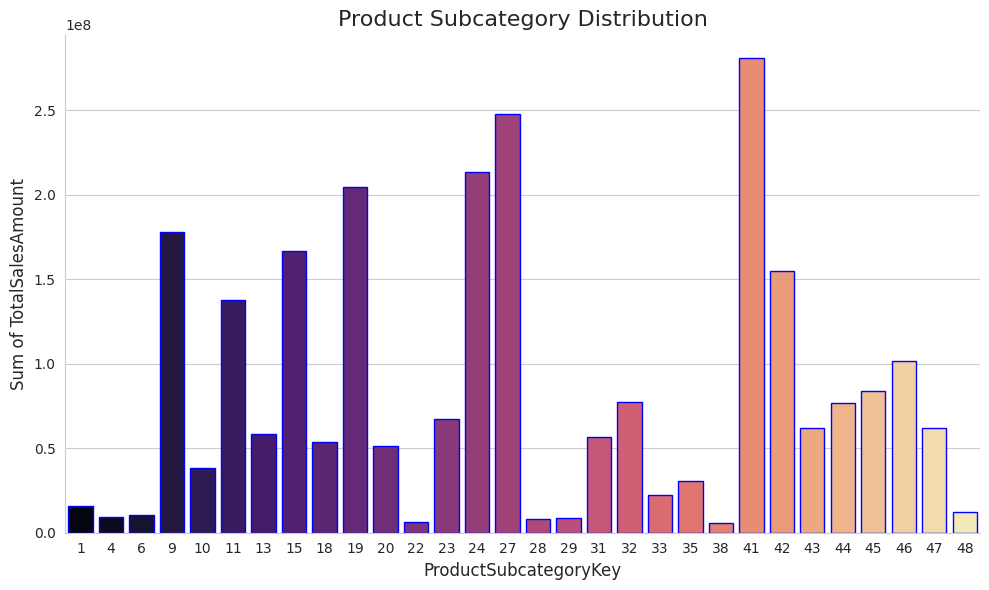

In [ ]:
# product subcategorydistribution
plot_bar_chart(df,'ProductSubcategoryKey','TotalSalesAmount',title='Product Subcategory Distribution',edgecolor='blue',annotate=False)

Category 41 and 27 had the most sales as customers bought it the most.

### 3.Which classname has the most sales?

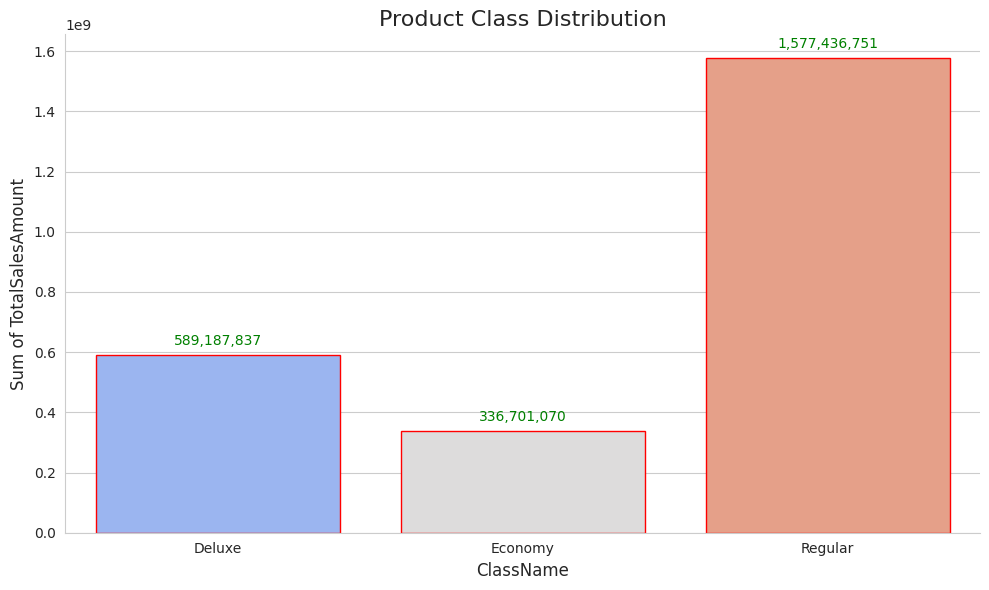

In [ ]:
# Product Class distribution
plot_bar_chart(df,'ClassName','TotalSalesAmount',title='Product Class Distribution',edgecolor='red',annotate=True,palette ='coolwarm')

Regular class items grossed the most sales having generated 1.5 billion $  revenue.

### 4. Which year and its respective months has the most sales?

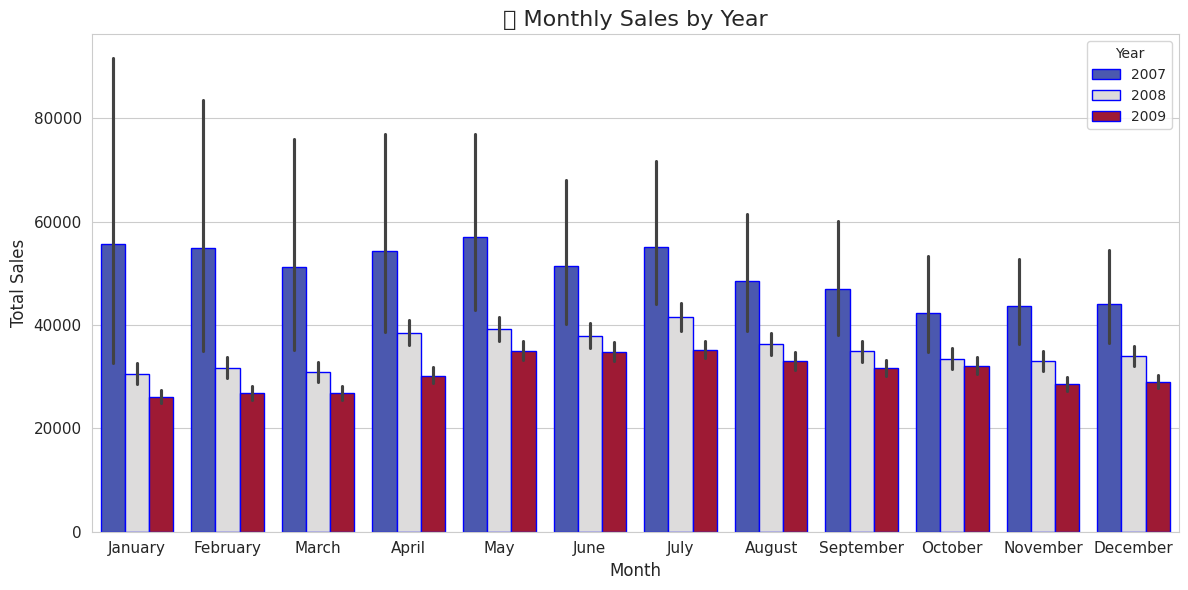

In [ ]:
# Plot grouped bar chart
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

sns.barplot(
    data=df,
    x='Months',
    y='TotalSalesAmount',
    hue='Year',                # Cluster by year
    palette='coolwarm',           # Try 'Set2', 'viridis', 'coolwarm'
    edgecolor='blue'
)

# Add title and labels
plt.title("📊 Monthly Sales by Year", fontsize=16, fontweight='medium')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.legend(title="Year")

plt.tight_layout()
plt.show()

* The year 2007 had the most sales with may accounting for the month with the most sales.
* The year 2008 comes in at second place with july accounting for the month with the most sales.
* Lastly is the year 2009 with may june and july accounting for months with the most sales.

Seems like the sales of from this particular organization kept dropping as the years went by.. Hmm what could the reason be?

### 5. Which manufactuurer produced products with the most sales

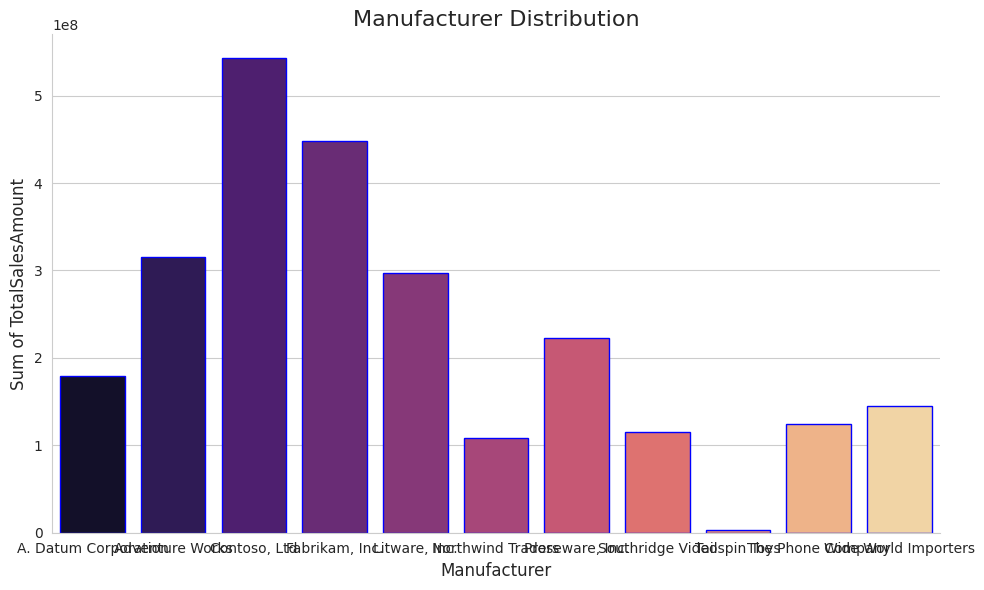

In [ ]:
# Manufactuerer Distributiion
plot_bar_chart(df,'Manufacturer','TotalSalesAmount',title='Manufacturer Distribution',edgecolor='blue',annotate=False)

Manufacturer value counts:  Manufacturer
Contoso, Ltd            19228
Fabrikam, Inc.           8367
Litware, Inc.            7575
Proseware, Inc.          7458
Adventure Works          5114
The Phone Company        4377
Southridge Video         4254
A. Datum Corporation     4187
Wide World Importers     4136
Northwind Traders        1389
Tailspin Toys             712
Name: count, dtype: int64  perecentage of Manufacturer
Contoso, Ltd            28.785724
Fabrikam, Inc.          12.526012
Litware, Inc.           11.340330
Proseware, Inc.         11.165172
Adventure Works          7.656032
The Phone Company        6.552689
Southridge Video         6.368549
A. Datum Corporation     6.268246
Wide World Importers     6.191895
Northwind Traders        2.079435
Tailspin Toys            1.065916
Name: count, dtype: float64


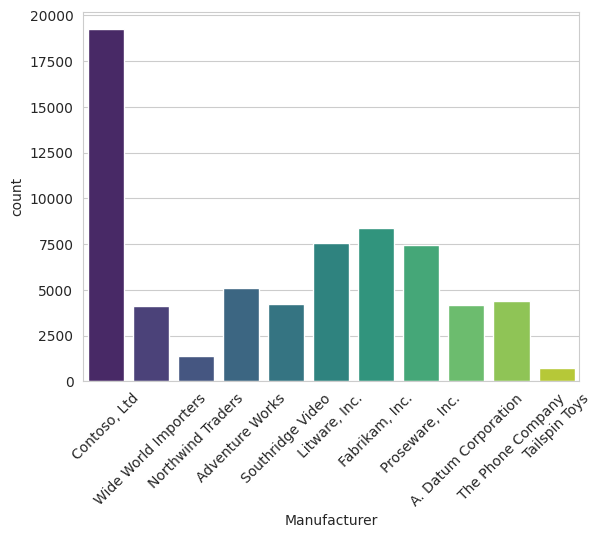

In [ ]:
# countplot of manufacturer
plt.xticks(rotation = 45)
sns.countplot(data =df, x='Manufacturer',palette='viridis')
# respective value counts
manufacturer_counts = df['Manufacturer'].value_counts()
manufacturer_counts_percent = df['Manufacturer'].value_counts()/len(df) * 100
print("Manufacturer value counts: ",manufacturer_counts, f' perecentage of {manufacturer_counts_percent}' )

**Contoso Ltd** generated the highest sales overall, largely due to its position as the manufacturer with the widest product portfolio—responsible for approximately 29% of all products developed. In contrast, **Fabrikam Inc.** ranks second in total sales, despite producing only about 13% of the total product range

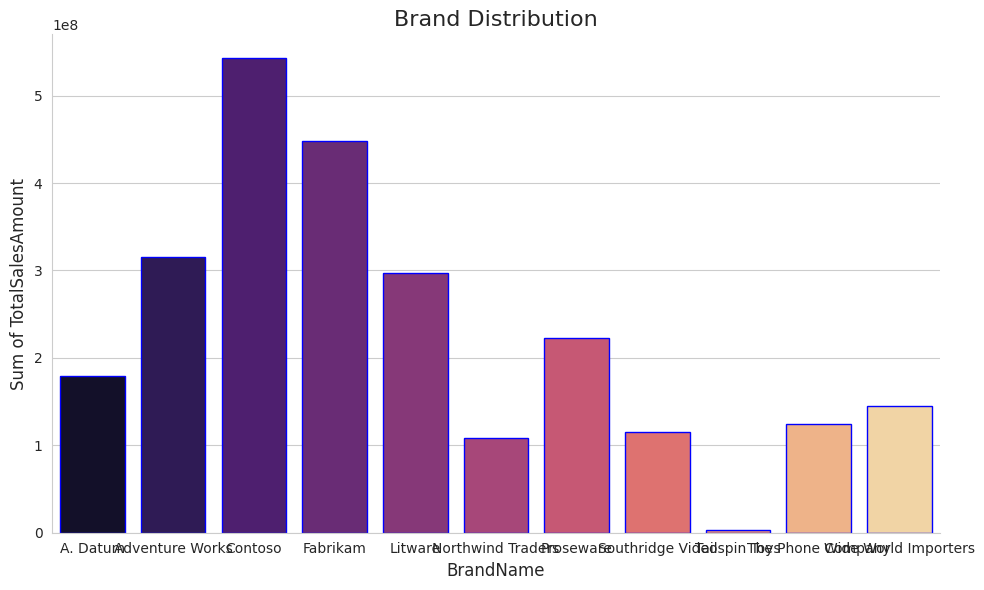

In [ ]:
# Brandname Distributiion
plot_bar_chart(df,'BrandName','TotalSalesAmount',title='Brand Distribution',edgecolor='blue',annotate=False)

### 6. What is the rate of product return from customers?

Return value counts:  TotalReturnQuantity
1     22202
0     19450
2     14273
3      6865
4      2696
5       927
6       270
7        82
8        26
9         4
10        2
Name: count, dtype: int64  perecentage of TotalReturnQuantity
1     33.238020
0     29.118074
2     21.367726
3     10.277408
4      4.036109
5      1.387787
6      0.404210
7      0.122760
8      0.038924
9      0.005988
10     0.002994
Name: count, dtype: float64


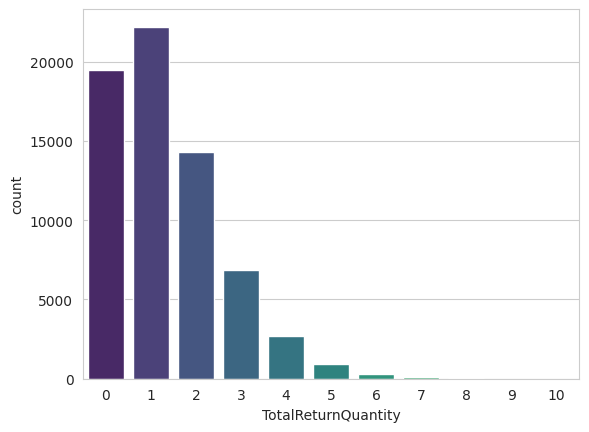

In [ ]:
# countplot of product return.
sns.countplot(data=df,x='TotalReturnQuantity',palette='viridis')
# Value counts of total return quantitiy
return_counts = df['TotalReturnQuantity'].value_counts()
return_counts_percent = df['TotalReturnQuantity'].value_counts()/len(df) * 100
print("Return value counts: ",return_counts, f' perecentage of {return_counts_percent}' )

Customer return behavior indicates that 33.24% of customers return exactly one purchased product accounting for the largest segment overall. The second-largest group, 29.12%, makes no returns, followed closely by 21.37% of customers who return two products. Returns of three or more items occur far less frequently, each accounting for less than 10%.

### 7.What is the distribution of weight and how does it scale in regards to revenue?

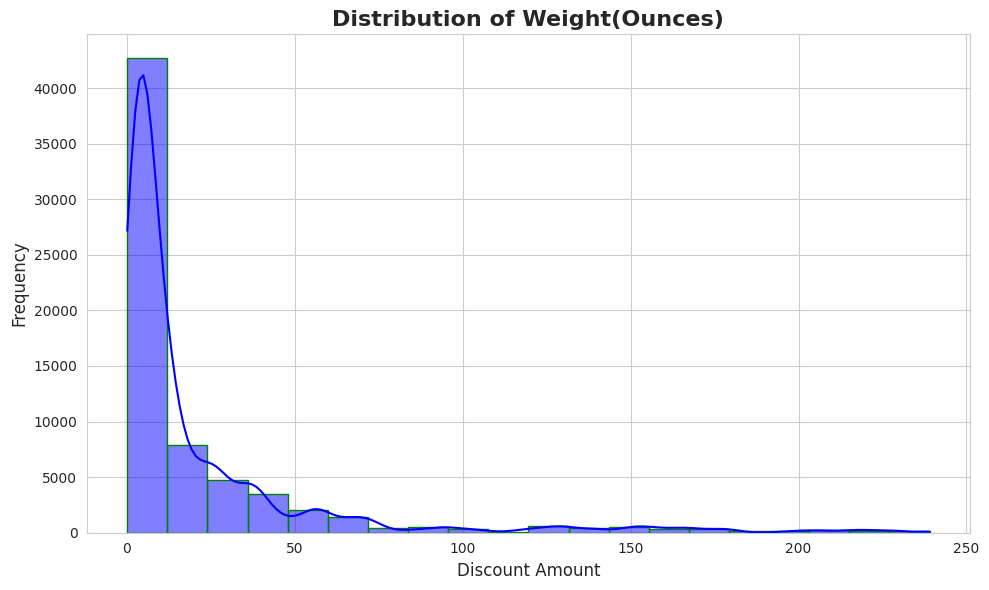

In [ ]:
# Weight distribution
plt.figure(figsize=(10, 6))

# Plot histogram with KDE (smoothed line) and custom bins
sns.histplot(
    data=df,
    x='Weight',
    bins=20,             # More bins = more granularity; try 50 or 100
    kde=True,             # Adds a smooth distribution line
    color='blue',
    edgecolor='green',
)

# Labels and title
plt.title('Distribution of Weight(Ounces)', fontsize=16, fontweight='bold')
plt.xlabel('Discount Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

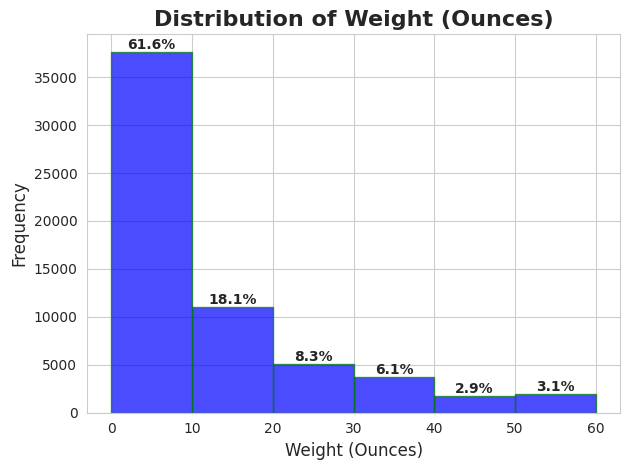

In [ ]:

# Create histogram and capture bin data
counts, bin_edges, patches = plt.hist(
    df['Weight'],
    bins=range(0, 61, 10),
    color='blue',
    edgecolor='green',
    alpha=0.7
)

# Calculate total for percentage conversion
total = counts.sum()

# Add percentage labels to bars
for count, edge in zip(counts, bin_edges):
    if count > 0:  # Only label non-empty bins
        plt.text(
            edge + 5,                   # Center label horizontally
            count,                      # Position label above bar
            f"{(count/total)*100:.1f}%",# Percentage label
            ha='center',
            va='bottom',
            fontsize=10,
            fontweight='bold'
        )

# Labels and title
plt.title('Distribution of Weight (Ounces)', fontsize=16, fontweight='bold')
plt.xlabel('Weight (Ounces)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()


### 8.How many items are customers buying?

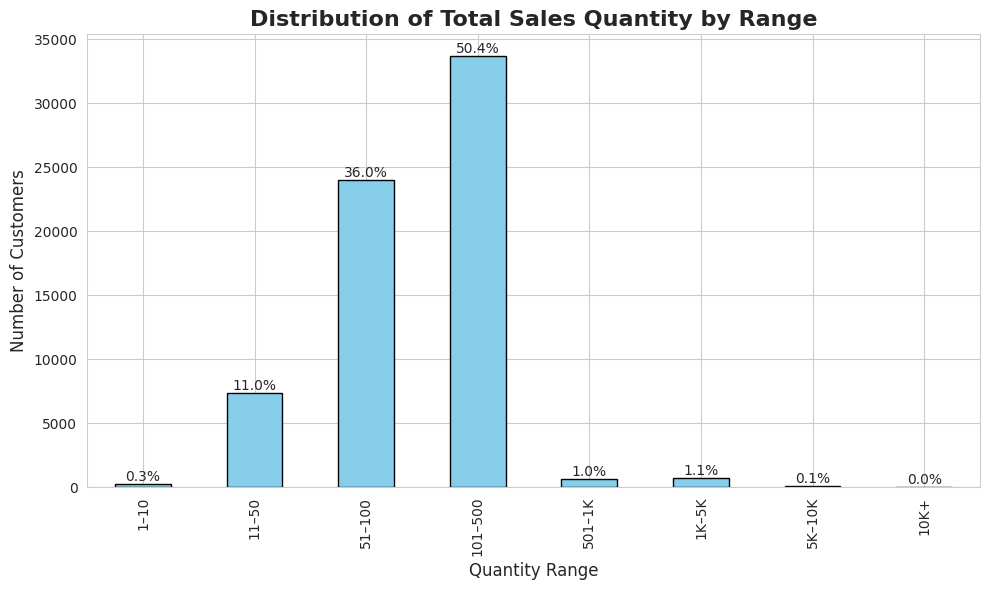

In [ ]:
# Your bins and labels
bins = [0, 10, 50, 100, 500, 1000, 5000, 10000, 32000]
labels = [
    '1–10', '11–50', '51–100', '101–500',
    '501–1K', '1K–5K', '5K–10K', '10K+'
]

# Create binned categories
df['QuantityRange'] = pd.cut(df['TotalSalesQuantity'], bins=bins, labels=labels, right=True)

# Count frequencies per bin
bin_counts = df['QuantityRange'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))
bin_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Labels and title
plt.title('Distribution of Total Sales Quantity by Range', fontsize=16, fontweight='bold')
plt.xlabel('Quantity Range', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Add percentage labels above bars
total = bin_counts.sum()
for i, count in enumerate(bin_counts):
    plt.text(i, count, f"{(count/total)*100:.1f}%", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

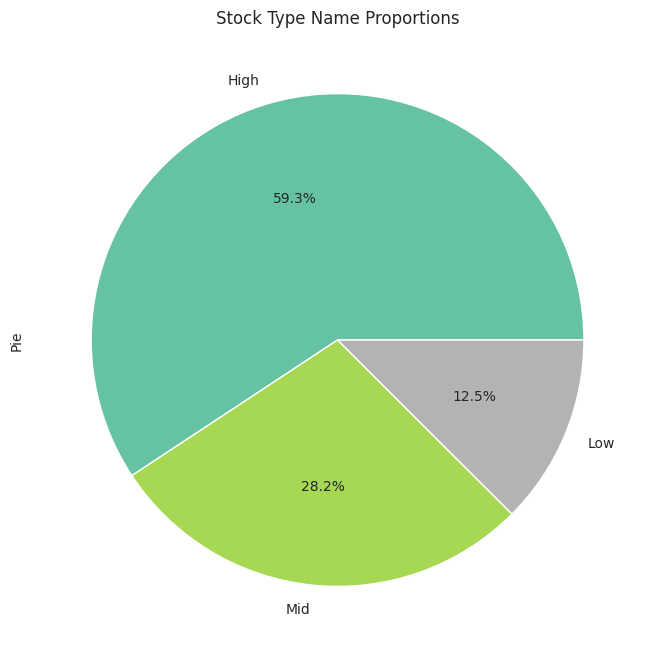

In [ ]:
#pie chart of Stock Type.
df['StockTypeName'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(8, 8), cmap='Set2')
plt.ylabel('Pie')
plt.title('Stock Type Name Proportions')
plt.show()

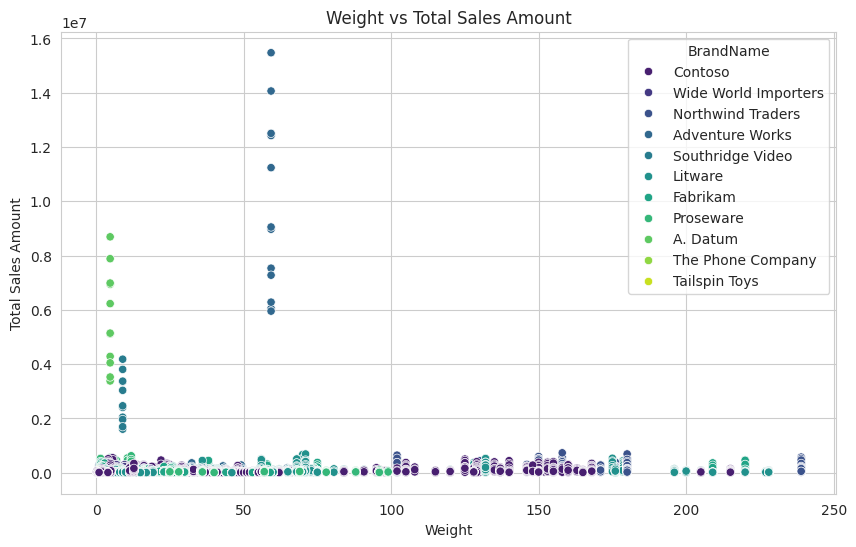

In [ ]:
# scatterplot of weight and totalsalesamount
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df,x='Weight',y='TotalSalesAmount',hue='BrandName',palette='viridis')
plt.title('Weight vs Total Sales Amount')
plt.xlabel('Weight')
plt.ylabel('Total Sales Amount')
plt.grid(True)

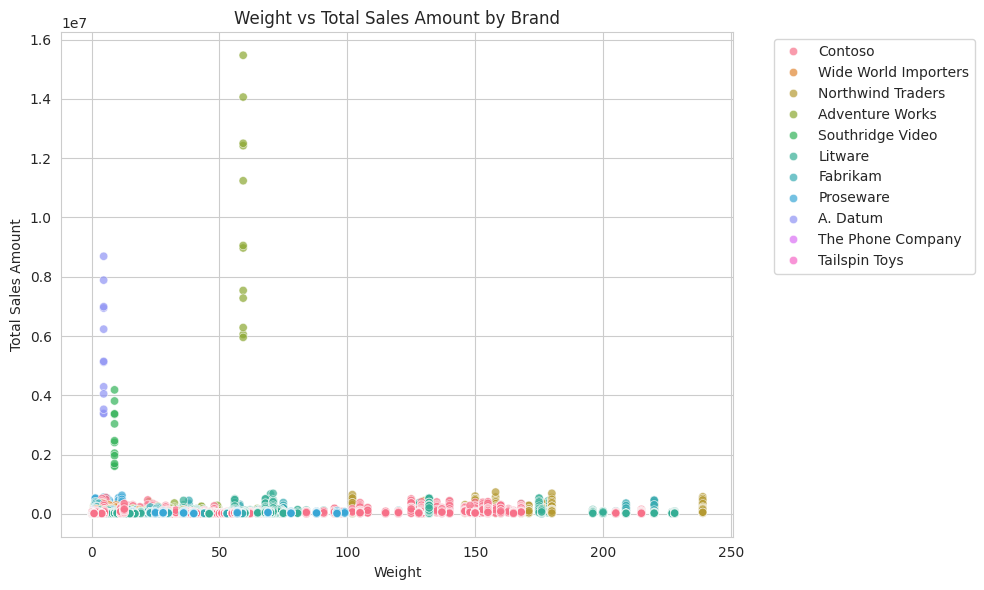

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Weight', y='TotalSalesAmount', hue='BrandName', alpha=0.7)
plt.title('Weight vs Total Sales Amount by Brand')
plt.xlabel('Weight')
plt.ylabel('Total Sales Amount')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Data Modelling

In [ ]:
# add profit to data
df['Profit'] = (df['TotalSalesAmount'] - df['TotalDiscountAmount'] - df['TotalReturnAmount']) - df['TotalCost']
# preview data
df.head(5)

,ProductKey,ProductName,ProductDescription,ProductSubcategoryKey,Manufacturer,BrandName,ClassName,ColorName,Weight,StockTypeName,...,AvgUnitCost,AvgUnitPrice,AVG_sales_quant_quota,TotalSalesQuota,TotalMarginQuota,Year,Months,Quota_month_date,QuantityRange,Profit
0,1,Contoso 512MB MP3 Player E51 Silver,512MB USB driver plays MP3 and WMA,1,"Contoso, Ltd",Contoso,Economy,Silver,4.8,High,...,6.62,12.99,5.9099,17236.2865,7365.7322,2007,January,Jan 2007,51–100,129.6450
1,1,Contoso 512MB MP3 Player E51 Silver,512MB USB driver plays MP3 and WMA,1,"Contoso, Ltd",Contoso,Economy,Silver,4.8,High,...,6.62,12.99,6.1864,14559.6464,6462.8044,2007,February,Feb 2007,51–100,187.4848
2,1,Contoso 512MB MP3 Player E51 Silver,512MB USB driver plays MP3 and WMA,1,"Contoso, Ltd",Contoso,Economy,Silver,4.8,High,...,6.62,12.99,6.6866,13133.5868,5635.3919,2007,March,Mar 2007,51–100,135.7552
3,1,Contoso 512MB MP3 Player E51 Silver,512MB USB driver plays MP3 and WMA,1,"Contoso, Ltd",Contoso,Economy,Silver,4.8,High,...,6.62,12.99,7.3846,23295.9337,10731.9147,2007,April,Apr 2007,101–500,435.9736
4,1,Contoso 512MB MP3 Player E51 Silver,512MB USB driver plays MP3 and WMA,1,"Contoso, Ltd",Contoso,Economy,Silver,4.8,High,...,6.62,12.99,7.2222,22924.5680,10131.7624,2007,May,May 2007,51–100,352.0460


In [ ]:
# profit margin
df['ProfitMargin'] = (df['Profit'] /
    (df['TotalSalesAmount'] - df['TotalDiscountAmount'] - df['TotalReturnAmount'])
) * 100

In [ ]:
df.head(5)

,ProductKey,ProductName,ProductDescription,ProductSubcategoryKey,Manufacturer,BrandName,ClassName,ColorName,Weight,StockTypeName,...,AvgUnitPrice,AVG_sales_quant_quota,TotalSalesQuota,TotalMarginQuota,Year,Months,Quota_month_date,QuantityRange,Profit,ProfitMargin
0,1,Contoso 512MB MP3 Player E51 Silver,512MB USB driver plays MP3 and WMA,1,"Contoso, Ltd",Contoso,Economy,Silver,4.8,High,...,12.99,5.9099,17236.2865,7365.7322,2007,January,Jan 2007,51–100,129.6450,26.614319
1,1,Contoso 512MB MP3 Player E51 Silver,512MB USB driver plays MP3 and WMA,1,"Contoso, Ltd",Contoso,Economy,Silver,4.8,High,...,12.99,6.1864,14559.6464,6462.8044,2007,February,Feb 2007,51–100,187.4848,31.706964
2,1,Contoso 512MB MP3 Player E51 Silver,512MB USB driver plays MP3 and WMA,1,"Contoso, Ltd",Contoso,Economy,Silver,4.8,High,...,12.99,6.6866,13133.5868,5635.3919,2007,March,Mar 2007,51–100,135.7552,27.158905
3,1,Contoso 512MB MP3 Player E51 Silver,512MB USB driver plays MP3 and WMA,1,"Contoso, Ltd",Contoso,Economy,Silver,4.8,High,...,12.99,7.3846,23295.9337,10731.9147,2007,April,Apr 2007,101–500,435.9736,37.028076
4,1,Contoso 512MB MP3 Player E51 Silver,512MB USB driver plays MP3 and WMA,1,"Contoso, Ltd",Contoso,Economy,Silver,4.8,High,...,12.99,7.2222,22924.5680,10131.7624,2007,May,May 2007,51–100,352.0460,39.050877


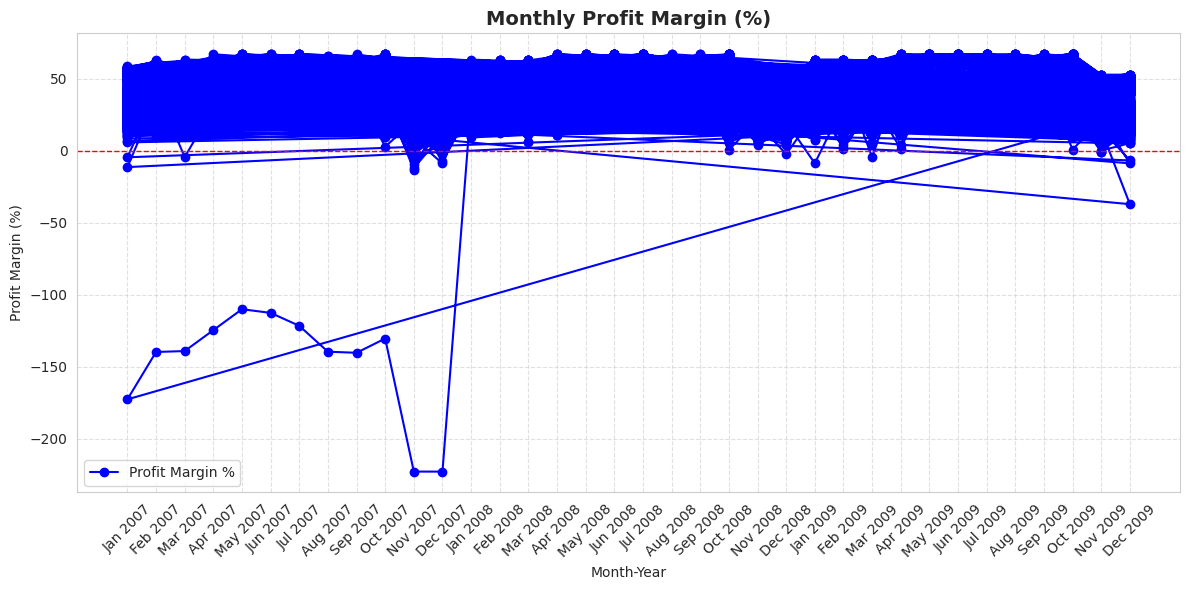

In [ ]:

# Plot the profit margin
plt.figure(figsize=(12, 6))
plt.plot(df['Sale_month_year'], df['ProfitMargin'], marker='o', color='blue', label='Profit Margin %')

plt.axhline(0, color='red', linestyle='--', linewidth=1)  # Line for breakeven point
plt.xticks(rotation=45)
plt.title('Monthly Profit Margin (%)', fontsize=14, fontweight='bold')
plt.xlabel('Month-Year')
plt.ylabel('Profit Margin (%)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

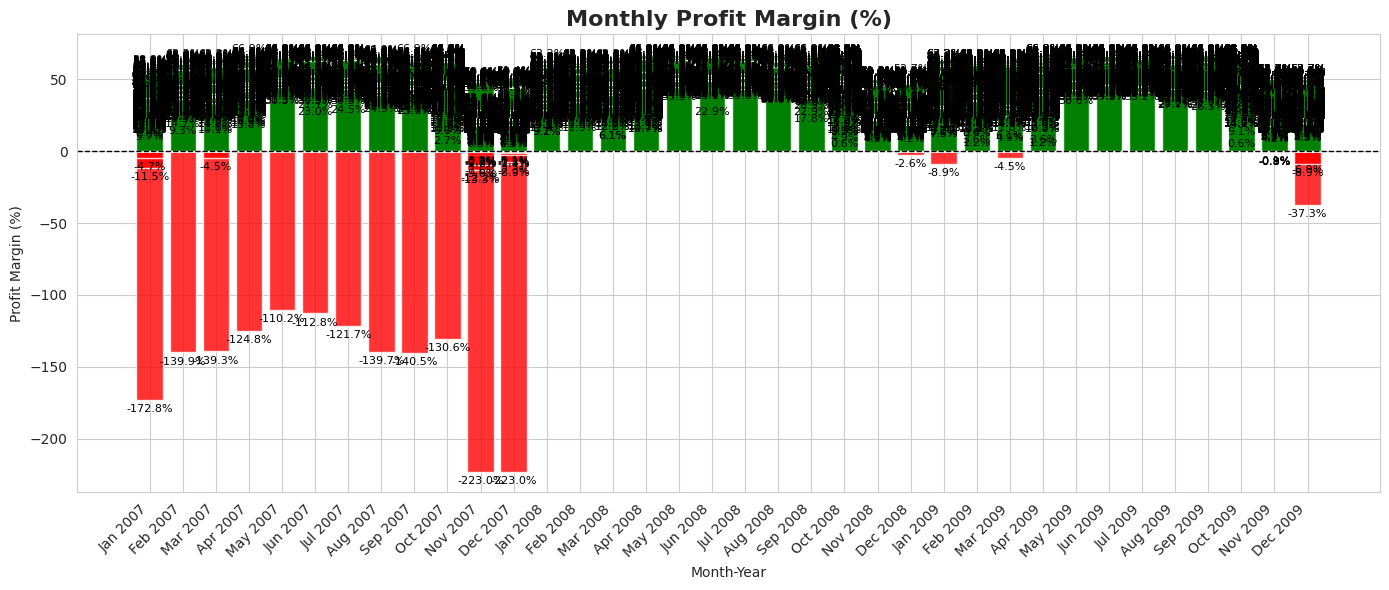

In [ ]:


# Color bars based on profit or loss
colors = ['green' if pm >= 0 else 'red' for pm in df['ProfitMargin']]

# Plot
plt.figure(figsize=(14, 6))
bars = plt.bar(df['Sale_month_year'], df['ProfitMargin'], color=colors, alpha=0.8)

# Add breakeven line
plt.axhline(0, color='black', linewidth=1, linestyle='--')

# Add labels above bars
for bar, pm in zip(bars, df['ProfitMargin']):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + (1 if height >= 0 else -3),
        f"{pm:.1f}%",
        ha='center',
        va='bottom' if height >= 0 else 'top',
        fontsize=8,
        color='black'
    )

# Customize chart
plt.xticks(rotation=45, ha='right')
plt.title('Monthly Profit Margin (%)', fontsize=16, fontweight='bold')
plt.xlabel('Month-Year')
plt.ylabel('Profit Margin (%)')
plt.tight_layout()
plt.show()

In [ ]:
# data ready for download
# Save the DataFrame to an Excel file on your local machine
file_path = 'C://Users//user//Desktop//Product_Sales_Data.xlsx'  # Specify the file name and path (e.g., 'C:/path/to/your/folder/Ecommerce_data.xlsx')
df.to_excel(file_path, index=False)